In [ ]:
For battery design and manufacturing, some parameters are related. Thus, we need to consider their impact on 
battery cost at the same time. In this example, we will study the impact of positive electrode thickness and 
porosity on cell cost.

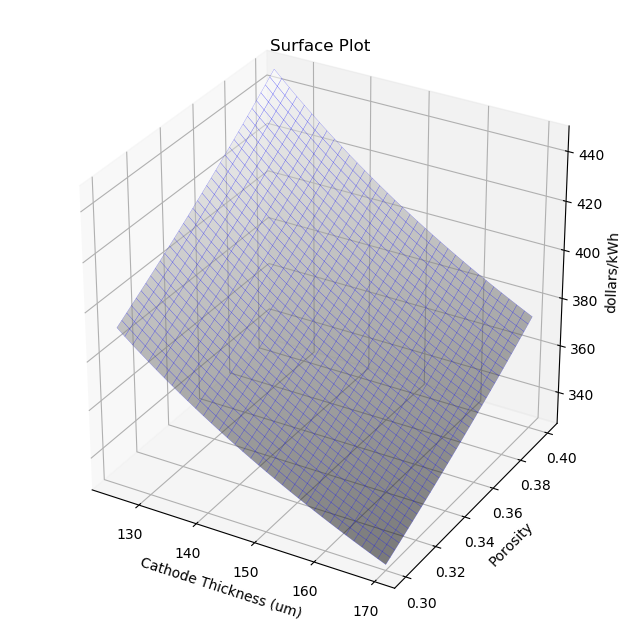

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [4]:
include("../src/PBCM.jl")

cell_general = cell()
cell_design_op = cylindrical_cell_designer(cell_general)
cost = cost_default()
cell_general, cost = convert_all(cell_general, cost, mult)

using PyPlot
using ForwardDiff

using3D()

cost.general_costs.no_units_mfg = converter(20.0, mult.units_mfg)
cost.cell_costs.cathode.AM[1]
n = 35

thic = range(125, stop=170, length=n)
poro = range(0.3, stop=0.4, length=n)

normalized_thic = range(0, 1, length = n)
normalized_poro = range(0, 1, length = n)


xgrid = repeat(thic', n, 1)
ygrid = repeat(poro, 1, n)

z = zeros(n,n)

z_grad_x = zeros(n,n)
z_grad_y = zeros(n,n)

legend_data = []


for i in 1:n, j in 1:n

    cell_general.cathode.por  = poro[j]
    cell_general.cathode.th   = converter(thic[i], mult.pos_th)


    dollars_kWh, MWh_per_year = cost_calc(cell_general, cost, system="Cell", cost_verbosity=0)
    z[j, i]                   = dollars_kWh

end


clf()
fig = figure("pyplot_surfaceplot", figsize=(8,8))
plot_surface(xgrid, ygrid, z, rstride=1, edgecolors="b", cstride=1, cmap=ColorMap("gray"), alpha=0.5, linewidth=0.1)
xlabel("Cathode Thickness (um)")
ylabel("Porosity")
zlabel("dollars/kWh")
title("Surface Plot")
figure(1)

The figure above shows the variaton of battery cost with positive electrode thickness and porosity. Specifically, We studied the battery cost when the cathode thickness is from 125 to 170 microns and the porosity is from 0.3 to 0.4. It shows that the battery cost decreases as the porosity decreases, and decreases as the thickness increases. This trend suggests that thick electrode technology can not only improve performance, but also bring cost reduction.